In [5]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [7]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [9]:
type(train_images)

numpy.ndarray

In [10]:
type(train_labels)

numpy.ndarray

In [11]:
print(len(train_labels))

60000


In [13]:
print(len(train_images))

60000


In [14]:
print(train_images[0].shape)

(28, 28)


In [15]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

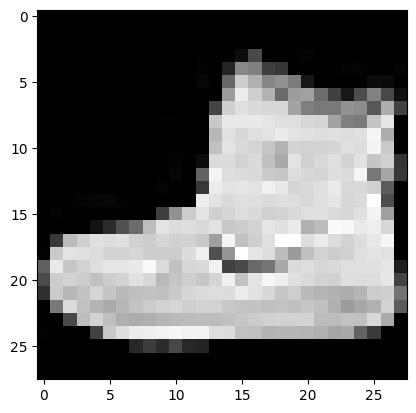

In [16]:
plt.imshow(train_images[0], cmap = 'gray')
plt.show()

In [17]:
print(train_labels[0])

9


normalising the image pixels

In [20]:
train_images = train_images/255.0

In [21]:
test_images = test_images/255.0

In [23]:
# reshape image to specify that it's a single channel(grayscale)

train_images  = train_images.reshape((train_images.shape[0],28,28,1))
test_images   = test_images.reshape((test_images.shape[0],28,28,1))

In [24]:
# building a convolutional nueral network

In [25]:
# building the convolutional base

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

#  adding Dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense((10)))

In [28]:
#  compiling and training the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
# model training

history = model.fit(train_images,train_labels, epochs = 5, validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.9389 - accuracy: 0.6480 - val_loss: 0.7134 - val_accuracy: 0.7355
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6601 - accuracy: 0.7503 - val_loss: 0.6366 - val_accuracy: 0.7619
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5716 - accuracy: 0.7845 - val_loss: 0.5520 - val_accuracy: 0.7950
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5121 - accuracy: 0.8092 - val_loss: 0.5299 - val_accuracy: 0.8063
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4760 - accuracy: 0.8219 - val_loss: 0.4968 - val_accuracy: 0.8180


In [30]:
#  model evaluation
# evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4968 - accuracy: 0.8180 - 899ms/epoch - 3ms/step

Test accuracy: 0.8180000185966492


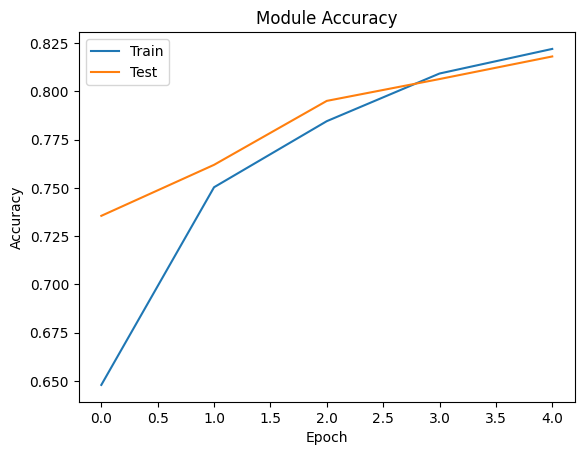

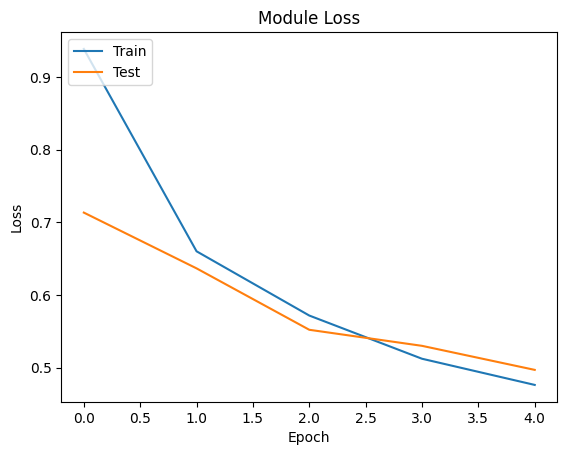

In [31]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Module Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc ='upper left')
plt.show()

# plot training and validation loss valus
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Module Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc ='upper left')
plt.show()